In [46]:
#importing all the necessary packages
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [47]:
#defining NN parameters
input_size = 784 
hidden_size = 500
num_classes = 10
num_epochs = 12
batch_size = 128
learning_rate = 0.001

In [48]:
# Loading the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Creating the data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size, shuffle=False)

In [49]:
# Define the FNN model
class neural(nn.Module):
    def __init__(self):
        super(neural, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, batch_size)
        self.fc3 = nn.Linear(batch_size, num_classes)

    def forward(self, x):
        x = x.view(-1,784)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [50]:
model = neural()
optimizer = optim.Adam(model.parameters(), learning_rate)
criterion = nn.CrossEntropyLoss()

In [51]:
# Training the model
trainingloss = []
testingloss = []
for epoch in range(num_epochs):
    trainlossiteration= 0
    testlossiteration = 0
    for i, (images, labels) in enumerate(train_loader):
        # set parameter gradients = 0
        optimizer.zero_grad()
        outputs = model(images)
        #going backwards, forward feed and optimization
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        trainlossiteration+= loss.item()
    trainingloss.append(trainlossiteration/len(train_loader))

#code for finding the Test Loss
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            testlossiteration += loss.item()
        testingloss.append(testlossiteration/len(test_loader))

    print(f'Epoch {epoch+1}, Training Loss: {trainingloss[-1]:.4f}, Testing Loss: {testingloss[-1]:.4f}')

Epoch 1, Training Loss: 0.3030, Testing Loss: 0.1230
Epoch 2, Training Loss: 0.1058, Testing Loss: 0.0846
Epoch 3, Training Loss: 0.0671, Testing Loss: 0.0756
Epoch 4, Training Loss: 0.0489, Testing Loss: 0.0709
Epoch 5, Training Loss: 0.0344, Testing Loss: 0.0691
Epoch 6, Training Loss: 0.0254, Testing Loss: 0.0669
Epoch 7, Training Loss: 0.0218, Testing Loss: 0.0765
Epoch 8, Training Loss: 0.0165, Testing Loss: 0.0738
Epoch 9, Training Loss: 0.0144, Testing Loss: 0.0712
Epoch 10, Training Loss: 0.0151, Testing Loss: 0.0763
Epoch 11, Training Loss: 0.0109, Testing Loss: 0.0744
Epoch 12, Training Loss: 0.0109, Testing Loss: 0.0818


Label: 7


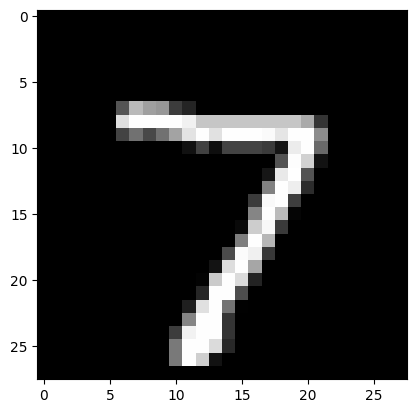

In [52]:
#Display a correctly predicted image
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        for i in range(len(labels)):
            if predicted[i] == labels[i]:
                print('Label: {}'.format(labels[i]))
                plt.imshow(images[i].squeeze(), cmap='gray')
                plt.show()
                break
        break

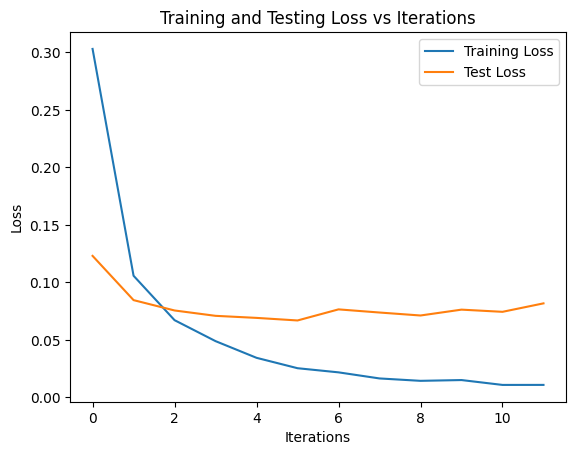

In [53]:
# Plotting the training and testing loss vs iteration curve
plt.plot(trainingloss, label='Training Loss')
plt.plot(testingloss, label='Test Loss')
plt.title('Training and Testing Loss vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()